In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import os

In [2]:
dataDir = "data/"
df = pd.read_csv(dataDir + "jobs.csv", encoding="latin_1")
for idx, sector in enumerate(df['Description']):
    if sector != sector:
        df = df.drop(idx)

C:\Users\arxli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
sectors = df['Description'].unique().tolist()
for idx, sector in enumerate(tqdm(sectors)):
    sectors[idx] = sector.strip().lower()
col_names = np.insert(sectors, 0, ['geofips'])
data = pd.DataFrame(columns=col_names)

df = df[['GeoFIPS', 'Description', '2018']]
fips = df['GeoFIPS'].unique()
a = {}
for fip in fips:
    a[fip.strip()] = []
arr = df.to_numpy()
for v in tqdm(arr):
    if (v[2] == "(D)" or v[2] == "(NA)" or v[2] == "(NM)"):
        v[2] = 0
    a[v[0].strip()].append((v[1].strip().lower(), int(v[2])))
for fip in tqdm(a.keys()):
    new_row = {}
    new_row['geofips'] = fip
    for pair in a[fip]:
        sector, jobs = pair
        new_row[sector] = jobs
    data = data.append(new_row, ignore_index=True)

In [42]:
data = data[data['total employment (number of jobs)'] != 0]
data

,geofips,total employment (number of jobs),wage and salary employment,proprietors employment,farm proprietors employment,nonfarm proprietors employment 2/,farm employment,nonfarm employment,private nonfarm employment,"forestry, fishing, and related activities",...,health care and social assistance,"arts, entertainment, and recreation",accommodation and food services,other services (except government and government enterprises),government and government enterprises,federal civilian,military,state and local,state government,local government
0,"""00000""",200746000,154375000,46371000,1790000,44581000,2604000,198142000,173599000,969400,...,22619800,4684900,15077500,11257900,24543000,2849000,1922000,19772000,5395000,14377000
1,"""01000""",2691517,2097496,594021,34969,559052,42220,2649297,2244830,15895,...,253353,41751,201350,171427,404467,53078,28629,322760,106914,215846
2,"""01001""",18115,12395,5720,317,5403,400,17715,15202,145,...,1580,488,1442,1657,2513,89,264,2160,237,1923
3,"""01003""",115166,80927,34239,770,33469,1115,114051,103246,726,...,10951,3193,14547,7557,10805,357,980,9468,1373,8095
4,"""01005""",11828,8775,3053,463,2590,554,11274,9540,256,...,0,79,733,848,1734,51,104,1579,604,975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,"""94000""",14133325,11085717,3047608,354533,2693075,434099,13699226,11882195,81053,...,1676503,292080,948137,730975,1817031,170968,130463,1515600,400640,1114960
3194,"""95000""",49226831,37606637,11620194,450786,11169408,614721,48612110,42262197,233195,...,5017680,1098006,3922463,2959564,6349913,785920,676851,4887142,1492741,3394401
3195,"""96000""",24904537,18520239,6384298,332138,6052160,408603,24495934,21393641,99305,...,2485934,453442,1913099,1388567,3102293,335751,257908,2508634,607210,1901424
3196,"""97000""",8053953,5983046,2070907,107604,1963303,154834,7899119,6835469,43888,...,736777,211282,608658,405725,1063650,122963,91572,849115,275792,573323


In [43]:
if os.path.exists(dataDir + "jobs_clean.csv"):
    os.remove(dataDir + "jobs_clean.csv")
    print("File deleted")
else:
    print("The file does not exist")
data.to_csv(dataDir + 'jobs_clean.csv', index=False, encoding='latin_1')

File deleted


In [59]:
job_numbers = data.drop(labels = 'geofips', axis = 1).to_numpy()
total, subtotals = np.split(job_numbers, [1], axis=1)
geofips = data['geofips'].to_numpy().reshape((-1, 1))

(array([[154375000, 46371000, 1790000, ..., 19772000, 5395000, 14377000],
        [2097496, 594021, 34969, ..., 322760, 106914, 215846],
        [12395, 5720, 317, ..., 2160, 237, 1923],
        ...,
        [18520239, 6384298, 332138, ..., 2508634, 607210, 1901424],
        [5983046, 2070907, 107604, ..., 849115, 275792, 573323],
        [26416983, 8178060, 134483, ..., 3405811, 875229, 2530582]],
       dtype=object),
 array([[200746000],
        [2691517],
        [18115],
        ...,
        [24904537],
        [8053953],
        [34595043]], dtype=object))

In [62]:
sector_shares = np.hstack((geofips, total, subtotals / total))
sector_shares = pd.DataFrame(sector_shares, columns = col_names)
sector_shares

if os.path.exists(dataDir + "jobs_shares.csv"):
    os.remove(dataDir + "jobs_shares.csv")
    print("File deleted")
else:
    print("The file does not exist")
sector_shares.to_csv(dataDir + 'jobs_shares.csv', index=False, encoding='latin_1')

The file does not exist


218 is Monterey, CA (large ass aquarium and fishing disctrict, perfectly reasonable)

355 is Hendry, FL (which is home to the Okaloacoochee Slough State Forest and various state preserves)

2462 is Sully, SD (right next to the Missouri River, so I guess tons of fishing)

2722 is McMullen, TX (apparently richest county in Texas. Very small)

The only one that remotely makes sence is Monterey...

229 14485.55595179468
232 21778.206602602837
234 17352.546746698183
258 11328.814587032786
458 14238.346503332019
1891 26475.205700739425
2989 12310.67638143745


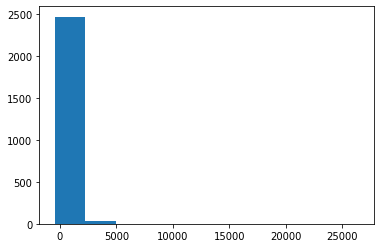

 "06075" 
 "06081" 
 "06085" 
 "08014" 
 "13121" 
 "36061" 
 "53033" 


Publishing includes software publishing (so here's "big tech", so to speak)

06075 is San Francisco, CA (omg what a shocker)

06081 is San Mateo, CA (Sony is headquartered here)

06085 is Santa Clara, CA (wow, I wonder what big tech companies are here)

08014 is Broomfield, CO (apparently a telecomm company named Lvl 3 Communications. Also a small company names Oracle)

13121 is Fulton Country, GA (it's Atlanta. Too many possibilities to count)

36061 is New York, NY (I'm, uh, not gonna bother on this one)

53033 is King County WA (This is home turf. Amazon, Microsoft, Steam, all here)